In [1]:
# Library importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import glob
from PIL import Image

# setting path for files:
# location of csvs for processing
path = r'E:/DOCUMENTS/STUDY/DataScience/Semester1/Programming/Portfolio/33/333/Data/' 
# output location for maps
output_path = 'E:/DOCUMENTS/STUDY/DataScience/Semester1/Programming/Portfolio/33/333/Maps/'
# generated pngs will be stored in the following location
fp_in = 'E:/DOCUMENTS/STUDY/DataScience/Semester1/Programming/Portfolio/33/333/Maps/*.png'
# generated gif will be stored in the following location
fp_out = 'E:/DOCUMENTS/STUDY/DataScience/Semester1/Programming/Portfolio/33/333/GIF/combined.gif'

PROJ: proj_create_from_database: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name


# Datasets were downloaded from the following locations: https://coronavirus.data.gov.uk/details/download
#### I have downloaded data for 9 regions   in England, and separately for: Wales, Scotland and Northern Ireland. Each datasets contain the following metrics: date, areaType, areaCode, areaName, newCasesByPublishDate, newDeathsByPublishDate. I processed only newCasesByPublishDate

In [2]:
# Opening mulitiple files from one location: 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col='date', header=0)
    li.append(df)
    df1 = pd.concat(li)
df1 = df1.reset_index()
df1

,date,areaType,areaCode,areaName,newCasesByPublishDate,newDeathsByPublishDate
0,03_02_2021,region,E12000004,East Midlands,1720,122
1,02_02_2021,region,E12000004,East Midlands,1439,123
2,01_02_2021,region,E12000004,East Midlands,1617,31
3,30_01_2021,region,E12000004,East Midlands,2241,110
4,29_01_2021,region,E12000004,East Midlands,2489,121
...,...,...,...,...,...,...
4771,07_01_2020,region,E12000003,Yorkshire and The Humber,0,0
4772,06_01_2020,region,E12000003,Yorkshire and The Humber,0,0
4773,05_01_2020,region,E12000003,Yorkshire and The Humber,0,0
4774,04_01_2020,region,E12000003,Yorkshire and The Humber,0,0


In [3]:
# getting proper order of dates
time_format = '%d_%m_%Y'
df1['n_date'] = pd.to_datetime(df1['date'], format=time_format)
df1.index = df1['n_date']
df1.drop(columns=['date','n_date'])
df1.index.names = ['Date']
df1 = df1.sort_index()

In [4]:
# combining data together
df2 = df1.pivot_table(index="areaName", columns="Date", values="newCasesByPublishDate")
df2.columns = df2.columns.astype(str)

In [5]:
df2

Date,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-11,2020-01-12,...,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29,2021-01-30,2021-01-31,2021-02-01,2021-02-02,2021-02-03
areaName,,,,,,,,,,,,,,,,,,,,,
East Midlands,0,0,0,0,0,0,0,0,0,0,...,1800,1392,1917,2296,2489,2241,1886,1617,1439,1720
East of England,0,0,0,0,0,0,0,0,0,0,...,2468,2002,2467,3076,3005,2312,2056,1866,1753,1764
London,0,0,0,0,0,0,0,0,0,0,...,3836,3816,4076,4367,5258,3541,3002,2851,2765,2973
North East,0,0,0,0,0,0,0,0,0,0,...,626,863,1167,1087,1186,794,886,715,753,900
North West,0,0,0,0,0,0,0,0,0,0,...,2929,2997,3329,3648,3588,2974,3077,2529,2319,2582
Northern Ireland,0,0,0,0,0,0,0,0,0,0,...,422,550,527,592,669,455,426,314,447,504
Scotland,0,0,0,0,0,0,0,0,0,0,...,752,1049,1330,1201,1155,994,1003,848,758,978
South East,0,0,0,0,0,0,0,0,0,0,...,3060,2420,3430,4087,4072,2932,2544,2350,1910,2330
South West,0,0,0,0,0,0,0,0,0,0,...,1369,1351,1322,2094,1532,1485,1347,1308,876,942


In [6]:
# set the filepath and load in a shapefile
# shapefile, containing NUTS Level1 was downloaded from the following location:
# https://geoportal.statistics.gov.uk/search?q=NUTS1_Boundaries%
# I used genaralised data.
# For further processing I needed population data as well, which was taken from this location:
# https://en.wikipedia.org/wiki/Countries_of_the_United_Kingdom_by_population
# both of them I combined in one file in QGIS after checking validity of my polygons:
# ### here's image from QGIS with osm/gmaps as basemap.
fp = "E:/DOCUMENTS/STUDY/DataScience/Semester1/Programming/Portfolio/33/333/ALL_27700SS.shp"
gdf = gpd.read_file(fp) # opening file in geopandas
gdf.head()
# creating new column - relation of 100k to population 
gdf['poop'] = (100000 / (gdf['population']))
# join the geodataframe with the cleaned up dataframe as pivot table
merged = pd.merge(gdf, df2, on = ['areaName','areaName']).set_index(['areaName'])
# calculating actual value of new cases per 100k cases
merged2 = merged.iloc[:, 5:].multiply(merged.iloc[:, 4], axis = 'rows')
# merging data again to have names of regions to display
merged3 = pd.merge(gdf, merged2, on = ['areaName','areaName']).set_index(['areaName'])

In [7]:
# set the min and max range for the choropleth map
vmin = 0 # can't be less than 0 cases per 100k people
max_v = merged2.max() # calculating max number of case per row(can use previous df)
vmax = int(round(max_v.max())) # calculatin max number of case in whole dataset

Let's print a map 2021-02-01
Another one bites the dust
Let's print a map 2021-02-02
Another one bites the dust
Let's print a map 2021-02-03
Another one bites the dust


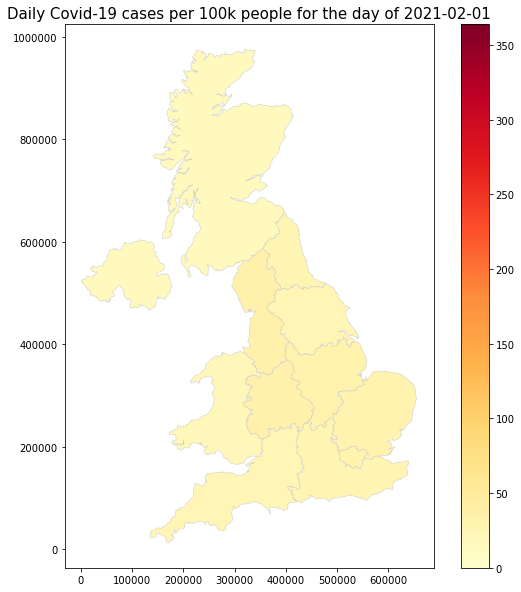

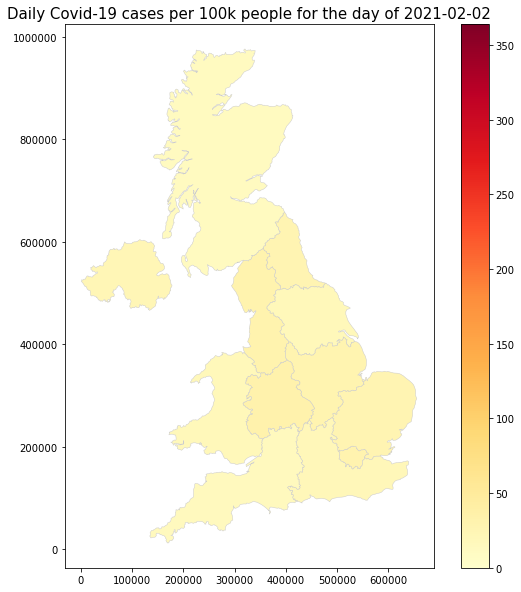

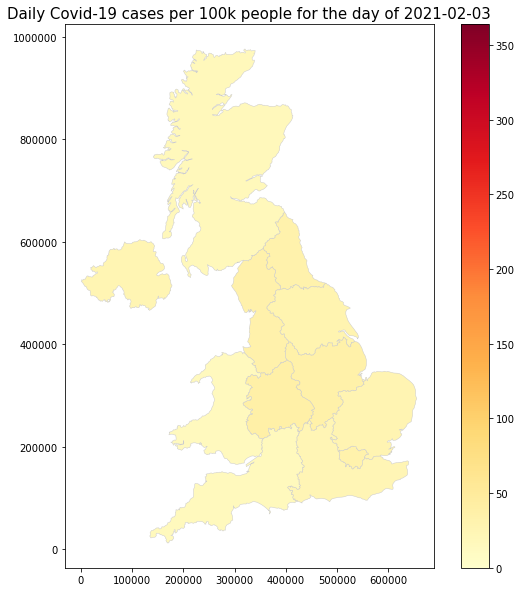

In [8]:
# start the for loop to create one map per year
# counter for the for loop
i = 0  

# loop to print map series
# https://towardsdatascience.com/how-to-make-a-gif-map-using-python-geopandas-and-matplotlib-cd8827cefbc8
for date in merged3.iloc[:, -3:]: # location on right side of bracket means how
# many maps we would like to print, [can't print anything within first 4 rows!] 
    # create map
    print('''Let's print a map''', date)
    fig = merged3.plot(column = date, cmap='YlOrRd', figsize=(10,10), linewidth=0.5,
                      edgecolor='0.8', vmin = vmin, vmax = vmax, legend = True)
    # add a title and font size
    fig.set_title('Daily Covid-19 cases per 100k people for the day of ' + date, y = 1, 
                  fontdict={'fontsize': '15', 'fontweight' : '3'})
    fig.get_yaxis().get_major_formatter().set_scientific(False) # removing scienfitic notation
    #if date > 0:
    #    fig = merged3.plot(column = date, c='White', figsize=(10,10), linewidth=0.5,
    #                  edgecolor='0.8', vmin = vmin, vmax = vmax, legend = True)    
# https://stackoverflow.com/questions/2578752/how-can-i-plot-nan-values-as-a-special-color-with-imshow-in-matplotlib
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join(output_path, date +'_new_covid_cases_by_dayrate.png')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300) # saving map to location
    print('Another one bites the dust') # confirmation of map printing

In [ ]:
# generating gif
img, *imgs= [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=output_path, format='GIF', append_images=imgs,
         save_all=True, duration=300, loop=1) 
print('All is done') # When everything is done return comment